In [118]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

%matplotlib inline


In [15]:
# Importing run splits from Garmin Connect and dropping summary and last row (.3km) from dataframe

run = pd.read_csv('IMMT_run.csv')
run = run.drop([run.index[43]])
run = run.drop([run.index[42]])

In [21]:
run['Laps'] = pd.to_numeric(run['Laps'])
run['Total Ascent'] = pd.to_numeric(run['Total Ascent'])
run['Total Descent'] = pd.to_numeric(run['Total Descent'])
run['Calories'] = pd.to_numeric(run['Calories'])
run['Beers Earned'] = pd.to_numeric(run['Beers Earned'])

In [54]:
run['Net Ascent'] = run['Total Ascent'] - run['Total Descent']

In [33]:
# as a measure of run economy, using the ratio of pace to HR

run['Speed'] = 1/run['Time']*60*60
run['Speed'] = run['Speed'].round(2)

In [39]:
# as a measure of run economy, using the ratio of pace to HR

run['RE'] = run['Speed']/run['Avg HR']*100
run['RE'] = run['RE'].round(2)

In [55]:
run.head()

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg GAP,Avg HR,Max HR,Total Ascent,Total Descent,...,Best Pace,Max Run Cadence,Moving Time,Avg Moving Pace,Beers Earned,Beers Earned.1,Pace,Speed,RE,Net Ascent
0,1,364,06:03.8,1.0,6:04,--,145,153,32,21,...,4:32,170,06:03.8,6:04,0.4,0.4,9.890110,9.89,6.82,11
1,2,381,12:24,1.0,6:21,--,153,160,45,43,...,5:23,168,6:20,6:20,0.4,0.4,9.448819,9.45,6.18,2
2,3,379,18:43,1.0,6:19,--,153,159,40,29,...,4:56,168,06:19.0,6:19,0.5,0.5,9.498681,9.50,6.21,11
3,4,345,24:28:00,1.0,5:45,--,155,165,30,32,...,5:08,165,5:44,5:44,0.3,0.3,10.434783,10.43,6.73,-2
4,5,397,31:05:00,1.0,6:37,--,154,161,22,43,...,5:19,165,6:33,6:33,0.5,0.5,9.068010,9.07,5.89,-21


In [23]:
run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Laps                      42 non-null     int64  
 1   Time                      42 non-null     int64  
 2   Cumulative Time           42 non-null     object 
 3   Distance                  42 non-null     float64
 4   Avg Pace                  42 non-null     object 
 5   Avg GAP                   42 non-null     object 
 6   Avg HR                    42 non-null     int64  
 7   Max HR                    42 non-null     int64  
 8   Total Ascent              42 non-null     int64  
 9   Total Descent             42 non-null     int64  
 10  Avg Power                 42 non-null     object 
 11  Avg W/kg                  42 non-null     object 
 12  Max Power                 42 non-null     object 
 13  Max W/kg                  42 non-null     object 
 14  Avg Run Cade

In [43]:
run.describe()

,Laps,Time,Distance,Avg HR,Max HR,Total Ascent,Total Descent,Avg Run Cadence,Avg Stride Length,Calories,Max Run Cadence,Beers Earned,Pace,Speed,RE
count,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,21.500000,396.738095,1.0,150.571429,156.214286,39.690476,38.761905,149.523810,1.016905,48.095238,168.976190,0.321429,9.111576,9.110476,6.047857
std,12.267844,25.867448,0.0,3.742588,3.917040,12.624962,12.752445,8.267592,0.054302,9.095186,13.656926,0.075015,0.592728,0.592288,0.314321
min,1.000000,345.000000,1.0,144.000000,150.000000,15.000000,18.000000,129.000000,0.890000,34.000000,162.000000,0.200000,7.792208,7.790000,5.410000
25%,11.250000,380.000000,1.0,148.000000,153.000000,31.250000,29.250000,145.250000,0.990000,41.000000,164.250000,0.300000,8.743179,8.745000,5.845000
50%,21.500000,398.000000,1.0,150.000000,155.000000,39.500000,36.000000,150.500000,1.025000,47.000000,166.000000,0.300000,9.045283,9.045000,6.020000
75%,31.750000,411.750000,1.0,153.750000,159.000000,45.000000,47.500000,156.750000,1.050000,53.750000,168.000000,0.400000,9.473684,9.470000,6.217500
max,42.000000,462.000000,1.0,158.000000,165.000000,86.000000,77.000000,163.000000,1.170000,66.000000,242.000000,0.500000,10.434783,10.430000,6.820000


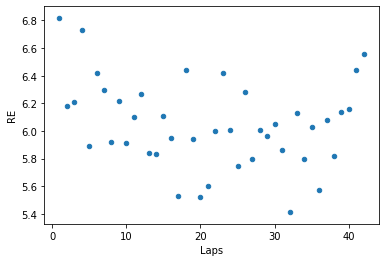

In [117]:
# When HR runs parallel to power/pace, they are coupled
# When HR incrwases for a specific pace, this is called decoupling
# While decoupling can be a measure of inadequate fitness
# Decoupling can also be triggered by factors such as msucle fatigue, lack of fuel, and altitude
# No surprise, decoupling will happen more than 10 hours into a race, but the key is to limit it
# RE overtime descreased until the last 5km when I got my "wings" from some Red Bull

run.plot(kind = 'scatter', x = 'Laps', y = 'RE')

In [119]:
# To prevent multicollinearity, speed/pace will be ommited, as it is driven by factors such as stride and cadence
# 

In [120]:
# For the regression model, the independent variables will be stride length (meters), cadence (steps per minute), and ascent (meters)
# There may be slight correlation between ascent and the other variables, but let's just assume I did enough hill training for it not to matter 

In [ ]:
# Plotting independent variables vs. the dependent variable Avg HR to visually see relationships

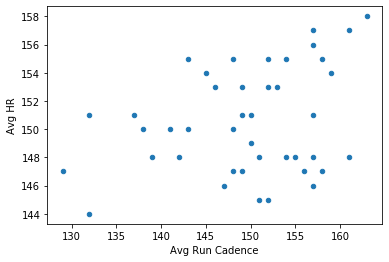

In [121]:
run.plot(kind = 'scatter', x = 'Avg Run Cadence', y = 'Avg HR')

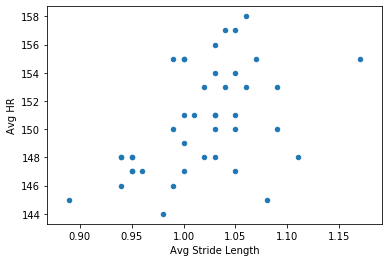

In [52]:
run.plot(kind = 'scatter', x = 'Avg Stride Length', y = 'Avg HR')

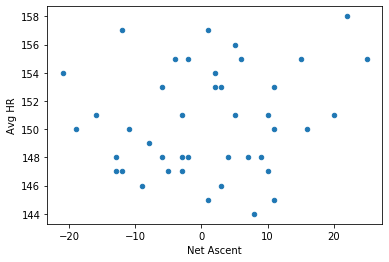

In [56]:
run.plot(kind = 'scatter', x = 'Net Ascent', y = 'Avg HR')

In [70]:
response = 'Avg HR'
y = run[[response]]
y.mean()

Avg HR    150.571429
dtype: float64

In [71]:
x = run[['Total Ascent', 'Avg Stride Length', 'Avg Run Cadence']]
x.mean()

Total Ascent          39.690476
Avg Stride Length      1.016905
Avg Run Cadence      149.523810
dtype: float64

In [65]:
model = LinearRegression().fit(x, y)

In [66]:
model.intercept_

array([68.36874056])

In [67]:
model.coef_

array([[3.07835313e-02, 4.64718352e+01, 2.25538960e-01]])

In [ ]:
# y = 68.37 + 0.0308 X Net Ascent + 4.647 * Stride Length + 0.226 X Cadence
# This is the model for predicting heart rate, based on the independent variables
# I was surprised to see the impact stride length had on HR, given how I expected ascent to be the dominant factor

In [73]:
# Testing out the model using average values for ascent, stride length, and cadence

68.3687 + 1.222452 + 47.257 + 33.71

150.558152

In [74]:
model.score(x, y)

0.4742100850422911

In [ ]:
# A little less than half of the variation in speed can be explained by net ascent, stride length, and run cadence
# Considering the huge impact of factors such as fatigue, struggling to keep up with fueling,etc, this was better than I expected

In [ ]:
# Generally you'll want to train and test for predictive modelling
# I had initially skipped it as I wasn't sure if it'd be worth it for a small dataset, but let's see how it goes
# Using 10% of the data as test data

In [99]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 1234) 

In [100]:
model = LinearRegression().fit(x_train, y_train)

In [101]:
model.intercept_

array([73.94326289])

In [102]:
model.coef_

array([[2.85932653e-02, 4.20181965e+01, 2.19497591e-01]])

In [103]:
model.score(x_test, y_test)

0.5617852925634713

In [104]:
y_pred = model.predict(x_test)

In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2.795187377153263

In [106]:
# Despite a relatively low number of data points, the mean aboslute error wasn't too bad (2.80 beats per min)
# Final insight: go train more so i can get data from a 160km ultramarathon